In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
df = pd.read_csv("stroke_data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.set_index('id',inplace=True)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.drop("ever_married",axis=1,inplace=True)
df.drop("work_type",axis=1,inplace=True)
df.drop("Residence_type",axis=1,inplace=True)

In [7]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,
9046,Male,67.0,0,1,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,171.23,34.4,smokes,1
1665,Female,79.0,1,0,174.12,24.0,never smoked,1


In [8]:
df.shape

(5110, 8)

# Missing Value Analysis

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 9046 to 44679
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   avg_glucose_level  4909 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     4909 non-null   object 
 7   stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 345.2+ KB


In [13]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [14]:
numeric_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [15]:
categorical_cols

Index(['gender', 'smoking_status'], dtype='object')

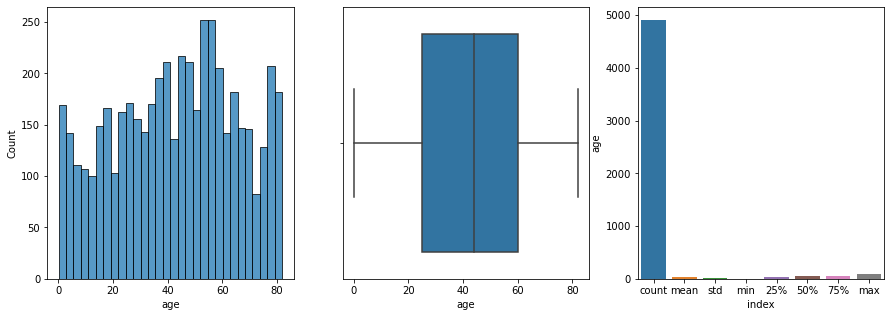

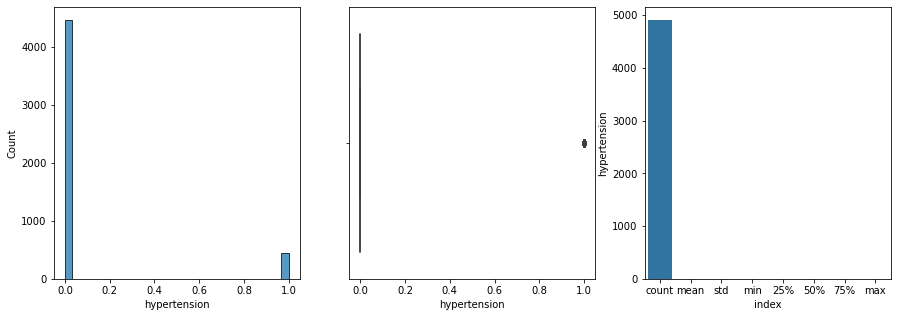

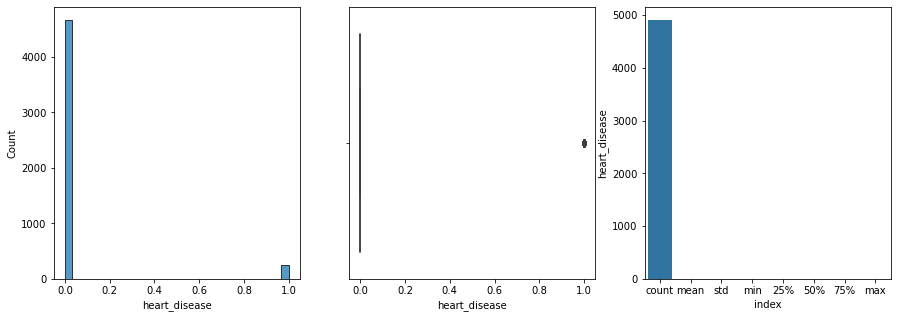

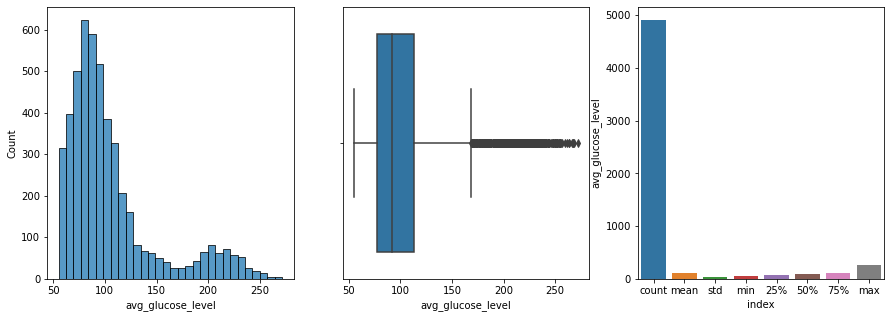

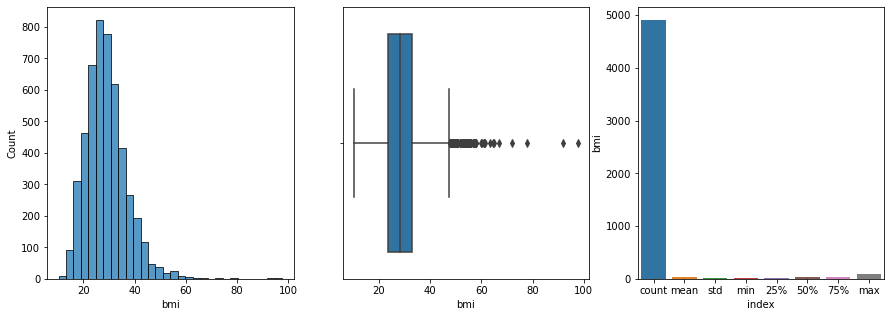

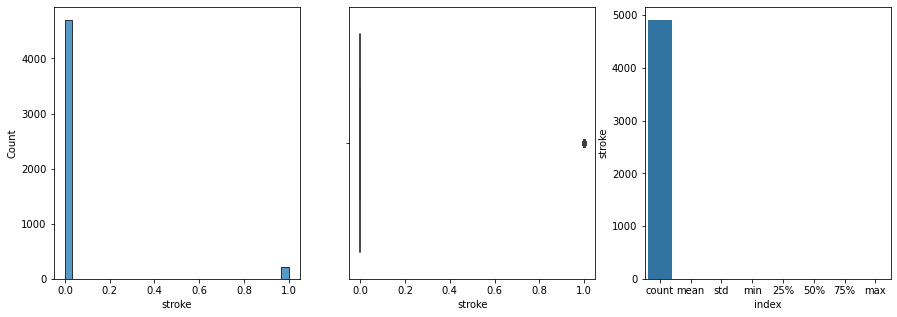

In [16]:
for col in numeric_cols:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=df, x=col, bins=30, ax = axs[0])
    sns.boxplot(x=df[col], ax=axs[1])
    sns.barplot(data= df[col].describe().reset_index(), x='index', y=col, ax=axs[2])

## Outlier Analysis

In [17]:
num_col = ['age','avg_glucose_level','bmi']

In [18]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.025)
df['Anomaly_Score'] = ee.fit_predict(df[num_col])

In [19]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Anomaly_Score
id,,,,,,,,,
9046,Male,67.0,0,1,228.69,36.6,formerly smoked,1,1
31112,Male,80.0,0,1,105.92,32.5,never smoked,1,1
60182,Female,49.0,0,0,171.23,34.4,smokes,1,1
1665,Female,79.0,1,0,174.12,24.0,never smoked,1,1
56669,Male,81.0,0,0,186.21,29.0,formerly smoked,1,1
...,...,...,...,...,...,...,...,...,...
14180,Female,13.0,0,0,103.08,18.6,Unknown,0,1
44873,Female,81.0,0,0,125.20,40.0,never smoked,0,1
19723,Female,35.0,0,0,82.99,30.6,never smoked,0,1


In [20]:
df = df[df['Anomaly_Score']==1]

In [21]:
del df['Anomaly_Score']

In [22]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,
9046,Male,67.0,0,1,228.69,36.6,formerly smoked,1
31112,Male,80.0,0,1,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,171.23,34.4,smokes,1
1665,Female,79.0,1,0,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
14180,Female,13.0,0,0,103.08,18.6,Unknown,0
44873,Female,81.0,0,0,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,82.99,30.6,never smoked,0


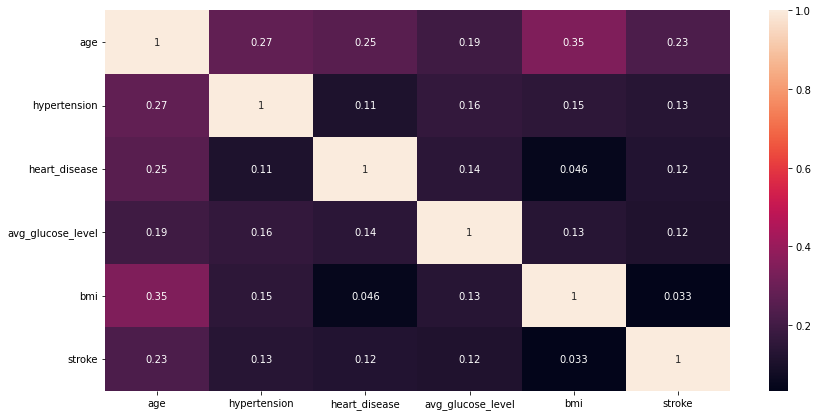

In [23]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['smoking_status'] = LabelEncoder().fit_transform(df['smoking_status'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_33772\2213169608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = LabelEncoder().fit_transform(df['gender'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_33772\2213169608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = LabelEncoder().fit_transform(df['smoking_status'])


In [26]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,
9046,1,67.0,0,1,228.69,36.6,1,1
31112,1,80.0,0,1,105.92,32.5,2,1
60182,0,49.0,0,0,171.23,34.4,3,1
1665,0,79.0,1,0,174.12,24.0,2,1
56669,1,81.0,0,0,186.21,29.0,1,1


In [27]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(df)

In [28]:
pca.explained_variance_ratio_

array([7.47813128e-01, 2.28483546e-01, 2.30331908e-02, 4.86739789e-04,
       1.13124949e-04, 3.42067423e-05, 1.96040224e-05, 1.64599709e-05])

In [29]:
zipped=list(zip(df.columns,pca.explained_variance_ratio_))

In [30]:
zipped

[('gender', 0.7478131278480765),
 ('age', 0.22848354591710537),
 ('hypertension', 0.023033190760370137),
 ('heart_disease', 0.0004867397894013335),
 ('avg_glucose_level', 0.00011312494935102696),
 ('bmi', 3.4206742347178504e-05),
 ('smoking_status', 1.9604022406946846e-05),
 ('stroke', 1.6459970941600967e-05)]

In [31]:
sort_zipped=sorted(zipped,key=lambda x:x[1],reverse=True)
sort_zipped

[('gender', 0.7478131278480765),
 ('age', 0.22848354591710537),
 ('hypertension', 0.023033190760370137),
 ('heart_disease', 0.0004867397894013335),
 ('avg_glucose_level', 0.00011312494935102696),
 ('bmi', 3.4206742347178504e-05),
 ('smoking_status', 1.9604022406946846e-05),
 ('stroke', 1.6459970941600967e-05)]

In [32]:
new_df=pd.DataFrame(sort_zipped,columns=['columns','variance'])

In [33]:
new_df

,columns,variance
0,gender,0.747813
1,age,0.228484
2,hypertension,0.023033
3,heart_disease,0.000487
4,avg_glucose_level,0.000113
5,bmi,0.000034
6,smoking_status,0.000020
7,stroke,0.000016


In [34]:
new_df['cumsum']=new_df['variance'].cumsum()

In [35]:
new_df

,columns,variance,cumsum
0,gender,0.747813,0.747813
1,age,0.228484,0.976297
2,hypertension,0.023033,0.999330
3,heart_disease,0.000487,0.999817
4,avg_glucose_level,0.000113,0.999930
5,bmi,0.000034,0.999964
6,smoking_status,0.000020,0.999984
7,stroke,0.000016,1.000000


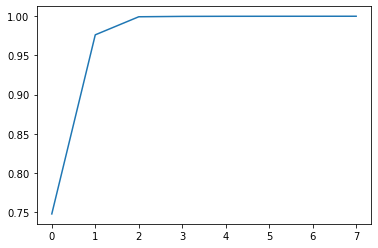

In [36]:
plt.plot(new_df['cumsum'])

# Identification of Optimum value of K

In [37]:
WCSS = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,20), 'WCSS':WCSS})
frame

,Cluster,WCSS
0,1,1.017210e+07
1,2,4.578554e+06
2,3,3.071139e+06
3,4,2.234851e+06
4,5,1.866426e+06
5,6,1.605238e+06
6,7,1.387581e+06
7,8,1.261084e+06
8,9,1.158247e+06
9,10,1.072852e+06


# Elbow Plot

Text(0, 0.5, 'WCSS')

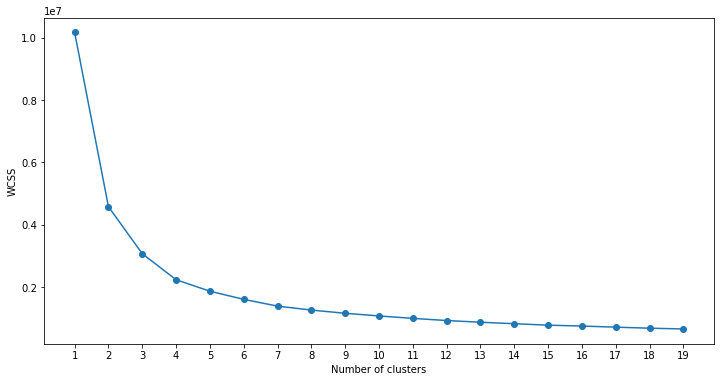

In [38]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['WCSS'], marker='o')
plt.xticks(range(1,20))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [39]:
kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42)
kmeans.fit(df)
pred = kmeans.predict(df)
pred

array([1, 0, 1, ..., 2, 1, 0])

In [40]:
df['Cluster'] = pred

C:\Users\DELL\AppData\Local\Temp\ipykernel_33772\2246332098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = pred


In [41]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Cluster
id,,,,,,,,,
9046,1,67.0,0,1,228.69,36.6,1,1,1
31112,1,80.0,0,1,105.92,32.5,2,1,0
60182,0,49.0,0,0,171.23,34.4,3,1,1
1665,0,79.0,1,0,174.12,24.0,2,1,1
56669,1,81.0,0,0,186.21,29.0,1,1,1
...,...,...,...,...,...,...,...,...,...
14180,0,13.0,0,0,103.08,18.6,0,0,2
44873,0,81.0,0,0,125.20,40.0,2,0,3
19723,0,35.0,0,0,82.99,30.6,2,0,2


In [42]:
eps = []
min_samp = []
silhouette_sc = []
for e in [x/10 for x in range(1,10)]:
    for ms in range(2,30):
        print(e,ms)
        db = DBSCAN(eps=e,min_samples=ms,n_jobs=-1)
        db.fit(df)
        eps.append(e)
        min_samp.append(ms)
        if pd.Series(db.labels_).nunique() <2:
            silhouette_sc.append(-1)
        else:
            silhouette_sc.append(metrics.silhouette_score(df,db.labels_))

0.1 2
0.1 3
0.1 4
0.1 5
0.1 6
0.1 7
0.1 8
0.1 9
0.1 10
0.1 11
0.1 12
0.1 13
0.1 14
0.1 15
0.1 16
0.1 17
0.1 18
0.1 19
0.1 20
0.1 21
0.1 22
0.1 23
0.1 24
0.1 25
0.1 26
0.1 27
0.1 28
0.1 29
0.2 2
0.2 3
0.2 4
0.2 5
0.2 6
0.2 7
0.2 8
0.2 9
0.2 10
0.2 11
0.2 12
0.2 13
0.2 14
0.2 15
0.2 16
0.2 17
0.2 18
0.2 19
0.2 20
0.2 21
0.2 22
0.2 23
0.2 24
0.2 25
0.2 26
0.2 27
0.2 28
0.2 29
0.3 2
0.3 3
0.3 4
0.3 5
0.3 6
0.3 7
0.3 8
0.3 9
0.3 10
0.3 11
0.3 12
0.3 13
0.3 14
0.3 15
0.3 16
0.3 17
0.3 18
0.3 19
0.3 20
0.3 21
0.3 22
0.3 23
0.3 24
0.3 25
0.3 26
0.3 27
0.3 28
0.3 29
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.4 10
0.4 11
0.4 12
0.4 13
0.4 14
0.4 15
0.4 16
0.4 17
0.4 18
0.4 19
0.4 20
0.4 21
0.4 22
0.4 23
0.4 24
0.4 25
0.4 26
0.4 27
0.4 28
0.4 29
0.5 2
0.5 3
0.5 4
0.5 5
0.5 6
0.5 7
0.5 8
0.5 9
0.5 10
0.5 11
0.5 12
0.5 13
0.5 14
0.5 15
0.5 16
0.5 17
0.5 18
0.5 19
0.5 20
0.5 21
0.5 22
0.5 23
0.5 24
0.5 25
0.5 26
0.5 27
0.5 28
0.5 29
0.6 2
0.6 3
0.6 4
0.6 5
0.6 6
0.6 7
0.6 8
0.6 9
0.6 10
0.6 1

In [43]:
df_scores = pd.DataFrame(list(zip(eps,min_samp,silhouette_sc)),
                         columns=['eps','min_samples','score'])
df_scores.sort_values(by='score',ascending=False,inplace=True)
df_scores

,eps,min_samples,score
197,0.8,3,0.060112
225,0.9,3,0.060112
28,0.2,2,-0.026202
56,0.3,2,-0.114514
84,0.4,2,-0.517518
...,...,...,...
90,0.4,8,-1.000000
91,0.4,9,-1.000000
92,0.4,10,-1.000000
93,0.4,11,-1.000000


In [44]:
db = DBSCAN(eps=0.5,min_samples=22,n_jobs=-1)
db.fit(df)
pred = db.labels_
pred

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [45]:
df['cluster_1'] = pred

C:\Users\DELL\AppData\Local\Temp\ipykernel_33772\3555218769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_1'] = pred


In [46]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Cluster,cluster_1
id,,,,,,,,,,
9046,1,67.0,0,1,228.69,36.6,1,1,1,-1
31112,1,80.0,0,1,105.92,32.5,2,1,0,-1
60182,0,49.0,0,0,171.23,34.4,3,1,1,-1
1665,0,79.0,1,0,174.12,24.0,2,1,1,-1
56669,1,81.0,0,0,186.21,29.0,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...
14180,0,13.0,0,0,103.08,18.6,0,0,2,-1
44873,0,81.0,0,0,125.20,40.0,2,0,3,-1
19723,0,35.0,0,0,82.99,30.6,2,0,2,-1
